In [1]:
import pandas as pd
import plotly.graph_objects as go
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.patches as mpatches 
import seaborn as sns

In [4]:
# G = nx.random_geometric_graph(200, 0.125)
viz_path = "/Users/rebeccakrall/Data/Dashboard/Visualization.xlsx"

In [5]:
viz_data = pd.read_excel(viz_path, skiprows =1 )
viz_header = pd.read_excel(viz_path, header = [0,1])

In [7]:
viz_data = pd.read_excel(viz_path, skiprows =1 )
viz_header = pd.read_excel(viz_path, header = [0,1])
data_only = viz_data.iloc[:,5:-1]
column_cats = {k:v for v,k in viz_header.iloc[:,5:-1].columns}

lowest_dose = pd.DataFrame()
max_val = viz_data.iloc[:, -1]
for c in data_only.columns:
    if data_only[c].dtype != 'float64':
        vals = data_only[c].str.split(',', expand = True)[0]
        vals = vals.apply(lambda x: np.nan if 't' in str(x) else x)
    else:
        vals = data_only[c]
    dose = vals.astype(float)/max_val.astype(float)
    lowest_dose[c] = dose
lowest_dose = lowest_dose.dropna(axis = 1, how= 'all')

var_mapping = {}
for ind,col in enumerate(lowest_dose.columns):
    var_mapping[col] = ind

In [8]:
sig = lowest_dose.iloc[3,:].dropna().index
for edge in list(combinations(sig,2)):
    print(edge)

('LPS TNFa', 'LPS PI IL-6')
('LPS TNFa', 'Monocyte Infiltration MCP-1')
('LPS TNFa', 'Osteocalcin')
('LPS PI IL-6', 'Monocyte Infiltration MCP-1')
('LPS PI IL-6', 'Osteocalcin')
('Monocyte Infiltration MCP-1', 'Osteocalcin')


In [9]:
{k:v for v,k in viz_header.iloc[:,5:-1].columns}

{'OGTT': 'Metabolic',
 'ob/ob Fasted insulin': 'Metabolic',
 'DIO Food Intake - After Fast': 'Metabolic',
 'DIO Food Intake Chronic': 'Metabolic',
 'DIO Weight': 'Metabolic',
 'DIO Fasted Glucose': 'Metabolic',
 'DIO Fasted Leptin': 'Metabolic',
 'DIO Fasted Insulin': 'Metabolic',
 'DIO Fasted ADP': 'Metabolic',
 'DIO DEXA': 'Metabolic',
 'Stress-induced Cort': 'Metabolic',
 'Fed Leptin': 'Metabolic',
 'Fed Insulin': 'Metabolic',
 'PPI': 'Neuropsychiatric',
 'MES': 'Neuropsychiatric',
 'FST': 'Neuropsychiatric',
 'Modified Irwin': 'Neuropsychiatric',
 'OFA': 'Neuropsychiatric',
 'Fear': 'Neuropsychiatric',
 'TST': 'Neuropsychiatric',
 'PTZ-induced seizure': 'Neuropsychiatric',
 'EAE-OFA': 'Neurodegenerative',
 'MPTP-OFA': 'Neurodegenerative',
 'MPTP-DA': 'Neurodegenerative',
 'Hot Plate': 'Pain',
 'von Frey w/ carragenan': 'Pain',
 'Formalin': 'Pain',
 'LPS TNFa': 'Inflammation/Immunological',
 'LPS IL-6': 'Inflammation/Immunological',
 'LPS testosterone': 'Inflammation/Immunological',

In [10]:
G = nx.MultiGraph()
var_mapping = {}
for ind,col in enumerate(viz_data.iloc[:,5:-1].columns):
    var_mapping[col] = ind

categories ={'metabolic' : [0,12], 
             'neuropsych': [13,20], 
             'neurodegen': [21, 23], 
             'pain' : [24, 26],
             'inflamm': [27, 37], 
             'GI': [38, 40], 
             'urogenital': [41,41], 
             'cardio' : [42,42], 
             'derm':[43,43], 
             'bone':[44,44], 
             'hem':[45,45]}


In [11]:
assays = viz_data.iloc[:, 5:-1].columns
for ind, row in viz_data.iloc[:,5:-1].iterrows():
    exists =  ~row.isna()
    trend = row.notna() & row.str.contains('t')
    sig = assays[exists & ~trend]
    
    for edge in list(combinations(sig,2)):
        if var_mapping[edge[0]] not in G.nodes():
            G.add_node(var_mapping[edge[0]])
        if var_mapping[edge[1]] not in G.nodes():
            G.add_node(var_mapping[edge[1]])
        

        print(f'Edges: {var_mapping[edge[0]]}, {var_mapping[edge[1]]}')
        G.add_edge(var_mapping[edge[0]], var_mapping[edge[1]])
    # G.add_edges_from(list(combinations(sig, 2)))
    

Edges: 1, 2
Edges: 1, 7
Edges: 1, 13
Edges: 2, 7
Edges: 2, 13
Edges: 7, 13
Edges: 14, 29
Edges: 2, 4
Edges: 2, 8
Edges: 2, 13
Edges: 2, 17
Edges: 4, 8
Edges: 4, 13
Edges: 4, 17
Edges: 8, 13
Edges: 8, 17
Edges: 13, 17
Edges: 27, 34
Edges: 27, 44
Edges: 34, 44
Edges: 3, 5
Edges: 3, 8
Edges: 3, 44
Edges: 5, 8
Edges: 5, 44
Edges: 8, 44
Edges: 5, 8
Edges: 5, 44
Edges: 8, 44
Edges: 4, 14
Edges: 4, 27
Edges: 4, 28
Edges: 4, 34
Edges: 4, 44
Edges: 14, 27
Edges: 14, 28
Edges: 14, 34
Edges: 14, 44
Edges: 27, 28
Edges: 27, 34
Edges: 27, 44
Edges: 28, 34
Edges: 28, 44
Edges: 34, 44
Edges: 16, 44
Edges: 2, 3
Edges: 2, 4
Edges: 2, 5
Edges: 2, 28
Edges: 3, 4
Edges: 3, 5
Edges: 3, 28
Edges: 4, 5
Edges: 4, 28
Edges: 5, 28
Edges: 30, 31
Edges: 0, 2
Edges: 0, 3
Edges: 0, 4
Edges: 0, 12
Edges: 0, 27
Edges: 0, 34
Edges: 2, 3
Edges: 2, 4
Edges: 2, 12
Edges: 2, 27
Edges: 2, 34
Edges: 3, 4
Edges: 3, 12
Edges: 3, 27
Edges: 3, 34
Edges: 4, 12
Edges: 4, 27
Edges: 4, 34
Edges: 12, 27
Edges: 12, 34
Edges: 27, 34
E

In [ ]:
data = viz_data.iloc[:, 5:-1]
# data.loc[:,:].apply()

TypeError: DataFrame.apply() missing 1 required positional argument: 'func'

In [13]:
new_categories = {}
for key, value in categories.items():
    for v in range(value[0], value[1]+1):
        if v in G.nodes:
            new_categories[v] = key

In [14]:
final_cats = list(set(new_categories.values()))

In [15]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = positions[edge[0]]
    x1, y1 = positions[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = positions[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title=dict(
              text='Node Connections',
              side='right'
            ),
            xanchor='left',
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text


fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title=dict(
                    text="<br>Network graph made with Python",
                    font=dict(
                        size=16
                    )
                ),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/python/network-graphs/'> https://plotly.com/python/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

NameError: name 'positions' is not defined

In [377]:
# category_positions = {cat: (np.random.uniform(-10, 10), np.random.uniform(-5, 5)) for i, cat in enumerate(categories.keys())}
# category_positions
# num_categories = len(categories)
# grid_size = list(range(int(np.ceil((num_categories))))) # Create a roughly square grid
# xs = grid_size.copy()
# ys = grid_size.copy()
# random.shuffle(xs)
# random.shuffle(ys)
# category_positions = {}
# for category, x, y  in zip(categories.keys(), xs, ys):
#     category_positions[category] = (x, y)


MultiEdgeView([])

In [321]:
def circle_vertices(num_points, radius=1, center=(0, 0)):
    """
    Calculates the vertices of evenly spaced points along a circle.

    Args:
        num_points: The number of points to generate.
        radius: The radius of the circle.
        center: The center of the circle as a tuple (x, y).

    Returns:
        A list of tuples, where each tuple represents the (x, y) coordinates of a vertex.
    """
    angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    x_coordinates = center[0] + radius * np.cos(angles)
    y_coordinates = center[1] + radius * np.sin(angles)
    vertices = list(zip(x_coordinates, y_coordinates))
    return vertices




In [355]:
category_positions = {}
vertices = circle_vertices(len(final_cats))
random.shuffle(vertices)
for category, v  in zip(final_cats, vertices):
    # if category != 'urogenital':
    category_positions[category] = v
    # else:
    #     print(category)
# Spread nodes within each category
positions = {}

for i, node in enumerate(G.nodes):
    # print(node)
    category = new_categories[node]
    x_offset, y_offset = category_positions[category]
    positions[node] = (x_offset + np.random.uniform(-0.25, 0.25), 
                       y_offset + np.random.uniform(-0.25, .25))

In [356]:
categories

{'metabolic': [0, 12],
 'neuropsych': [13, 20],
 'neurodegen': [21, 23],
 'pain': [24, 26],
 'inflamm': [27, 37],
 'GI': [38, 40],
 'urogenital': [41, 41],
 'cardio': [42, 42],
 'derm': [43, 43],
 'bone': [44, 44],
 'hem': [45, 45]}

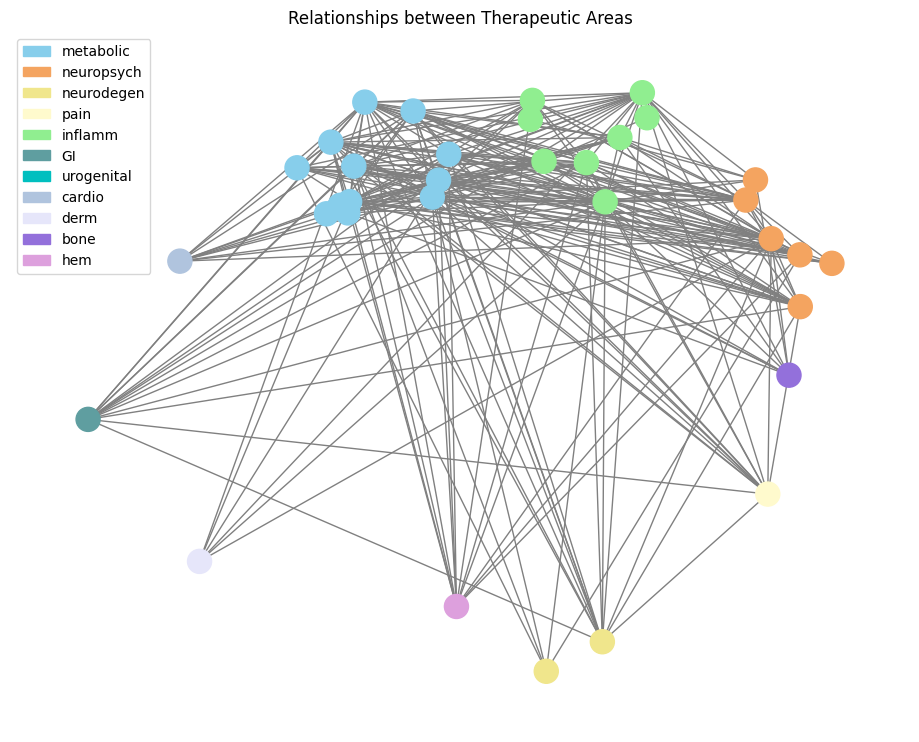

In [357]:
import matplotlib.colors as mcolors
copts = ['skyblue', 'sandybrown', 'khaki', 'lemonchiffon', 'lightgreen', 'cadetblue', 'c', 'lightsteelblue', 'lavender',  'mediumpurple', 'plum']
color_map = {cat: mcolors.to_rgba(color) for cat,color in zip(categories, copts)}
# 
# node_colors = [np.float64(mcolors.to_rgba(color)) for color in copts]
node_colors = [color_map[new_categories[n]] for n in G.nodes]
# node_colors =  ['skyblue', 'sandybrown', 'khaki', 'lemonchiffon', 'lightgreen', 'cadetblue', 'c', 'lightsteelblue', 'lavender',  'mediumpurple', 'plum','lightcoral']
# Draw graph
plt.figure(figsize=(9, 7))
nx.draw(G, pos=positions,  node_color=node_colors, edge_color='gray', node_size=300)
plt.title("Relationships between Therapeutic Areas")
# plt.colorbar()
# plt.show()

cm = []
for key, v in color_map.items():
# Creating legend with color box 
    cm.append(mpatches.Patch(color=v, label=key) )
              
plt.legend(handles=cm) 
plt.show()

In [343]:
len(node_colors)

34

In [388]:
    data_only = viz_data.iloc[:,5:-1]

    lowest_dose = pd.DataFrame()
    max_val = viz_data.iloc[:, -1]
    for c in data_only.columns:
        if data_only[c].dtype != 'float64':
            vals = data_only[c].str.split(',', expand = True)[0]
            vals = vals.apply(lambda x: np.nan if 't' in str(x) else x)
        else:
            vals = data_only[c]
        dose = vals.astype(float)/max_val.astype(float)
        lowest_dose[c] = dose
    lowest_dose = lowest_dose.dropna(axis = 1, how= 'all')

In [390]:
lowest_dose.shape

(20, 36)

In [232]:
data_only = viz_data.iloc[:,5:-1]

In [210]:
vals = data_only['DIO Food Intake - After Fast'].str.split(',', expand = True)[0]

vals.astype(float)/max_val.astype(float)

0     1.00
1      NaN
2     0.25
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8     1.00
9      NaN
10    1.00
11    0.10
12    0.03
13    0.30
14     NaN
15    0.30
16    1.00
17     NaN
18     NaN
19     NaN
dtype: float64

In [386]:
lowest_dose = pd.DataFrame()
max_val = viz_data.iloc[:, -1]
for c in data_only.columns:
    if data_only[c].dtype != 'float64':
        vals = data_only[c].str.split(',', expand = True)[0]
        vals = vals.apply(lambda x: np.nan if 't' in str(x) else x)
    else:
        vals = data_only[c]
    dose = vals.astype(float)/max_val.astype(float)
    lowest_dose[c] = dose


In [234]:
# lowest_dose = np.array(lowest_dose)
compounds = ['Compound '+str(x) for x in range(lowest_dose.shape[1])]
assays = data_only.columns

In [383]:
df = pd.concat(lowest_dose, axis = 1).dropna(axis = 1, how= 'all')

In [387]:
lowest_dose

,OGTT,ob/ob Fasted insulin,DIO Food Intake - After Fast,DIO Food Intake Chronic,DIO Weight,DIO Fasted Glucose,DIO Fasted Leptin,DIO Fasted Insulin,DIO Fasted ADP,DIO DEXA,...,Contact Hypersensitivity,Collagen-induced arthritis,Colonic Motility,Morphine-induced constipation,ACH writhing,Diuretic-induced stress (mic),Bleeding time,Sebum production,Osteocalcin,Hematology
0,NaN,0.1,1.00,NaN,NaN,NaN,NaN,0.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.25,NaN,1.00,NaN,NaN,NaN,0.250000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,NaN
4,NaN,NaN,NaN,0.333333,NaN,0.100000,NaN,NaN,0.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
5,NaN,NaN,NaN,NaN,NaN,0.033333,NaN,NaN,0.033333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033333,NaN
6,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,NaN
8,NaN,NaN,1.00,1.000000,1.00,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [384]:
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,42,43,44,45
0,NaN,0.1,1.00,NaN,NaN,NaN,NaN,0.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.25,NaN,1.00,NaN,NaN,NaN,0.250000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1,0.10,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,NaN
4,NaN,NaN,NaN,0.333333,NaN,0.100000,NaN,NaN,0.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
5,NaN,NaN,NaN,NaN,NaN,0.033333,NaN,NaN,0.033333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033333,NaN
6,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,NaN
8,NaN,NaN,1.00,1.000000,1.00,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


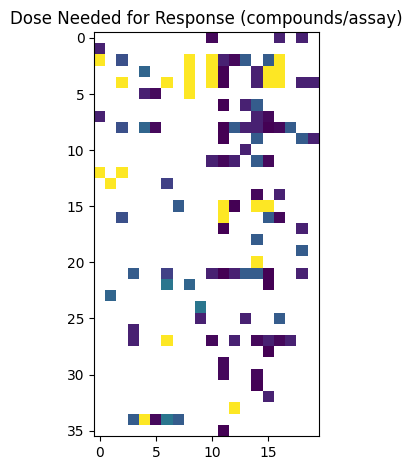

In [31]:
fig, ax = plt.subplots()
im = ax.imshow(np.array(df).T)

# Show all ticks and label them with the respective list entries
# ax.set_xticks(range(len(compounds)), labels=compounds,
#               rotation=45, ha="right", rotation_mode="anchor")
# ax.set_yticks(range(len(assays)), labels=assays)

# # Loop over data dimensions and create text annotations.
# for i in range(len(assays)):
#     for j in range(len(compounds)):
#         text = ax.text(j, i, lowest_dose[i, j],
#                        ha="center", va="center", color="w")

ax.set_title("Dose Needed for Response (compounds/assay)")
fig.tight_layout()
plt.show()

In [301]:
range(lowest_dose.shape[1])

range(0, 20)

In [287]:
minor_ticks = []
tick_positions = {}
for cat, values in categories.items():
    indices = [i for i,x in enumerate(df.columns) if x in range(values[0], values[1]+1)]
    if indices:
        if min(indices) == max(indices):
            tick_positions[cat] = min(indices)+0.5
        else:
            tick_positions[cat] = (min(indices) + max(indices) +1) / 2
            minor_ticks.append(min(indices)+0.5)
            minor_ticks.append(max(indices)+0.5)



In [288]:
tick_positions

{'metabolic': 6.0,
 'neuropsych': 15.0,
 'neurodegen': 19.0,
 'pain': 20.5,
 'inflamm': 26.0,
 'GI': 31.5,
 'cardio': 32.5,
 'derm': 33.5,
 'bone': 34.5,
 'hem': 35.5}

In [199]:
new_categories.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 23, 24, 27, 28, 29, 30, 31, 34, 36, 37, 38, 42, 43, 44, 45])

Text(120.72222222222221, 0.5, 'Compounds')

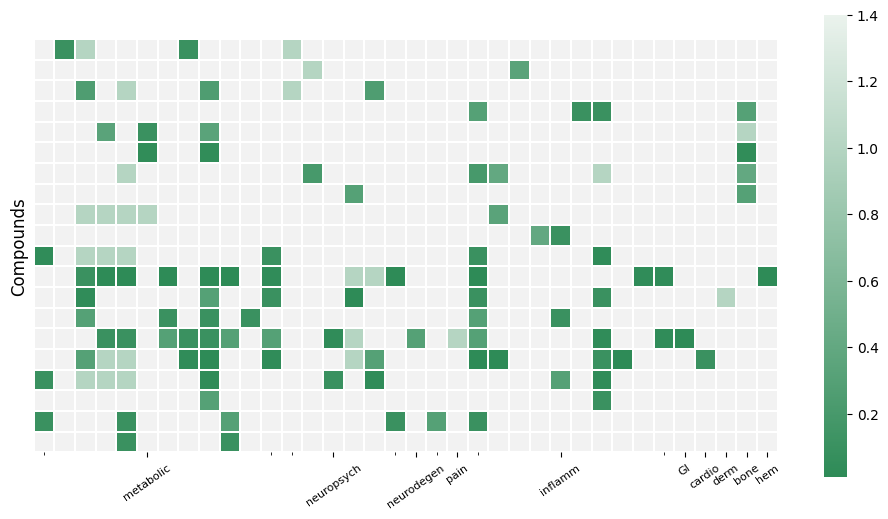

In [285]:
import matplotlib.ticker as ticker
# cm = sns.dark_palette("#69d", reverse=True, as_cmap=True)
# cm = sns.color_palette("light:b_r", as_cmap=True)
# cm = sns.color_palette("Blues_r", as_cmap=True)
plt.figure(figsize=(12, 6))
cm = sns.light_palette('seagreen', as_cmap= True, reverse = True)
ax = sns.heatmap(df, cmap = cm, square = True, vmax = 1.4, linecolor='w', linewidths= 0.01, cbar = True)
ax.collections[0].cmap.set_bad('0.95')

# ax.set_xticks(minor_ticks)
# ax.set_xticks(ticks = list(tick_positions.values()))
# ax.set_xticklabels(list(tick_positions.keys()), fontsize = 8, rotation = 35, ha = 'center')

ax.xaxis.set_major_locator(ticker.FixedLocator(list(tick_positions.values())))
ax.xaxis.set_minor_locator(ticker.FixedLocator(minor_ticks))
ax.set_xticklabels(list(tick_positions.keys()), fontsize = 8, rotation = 35, ha = 'center')

ax.set_yticks([])  # Remove y-ticks
ax.set_ylabel("Compounds", fontsize=12)  

In [183]:
df = df.loc[df.count(1).sort_values(ascending=True).index,:]
plt.figure(figsize=(12, 6))

copts = ['seagreen', 'skyblue',  'khaki', 'indianred',  'sandybrown', 'thistle', 'khaki', 'thistle',  'yellowgreen', 'cornflowerblue', 'turquoise']
copts = ['skyblue', 'sandybrown', 'khaki', 'lemonchiffon', 'lightgreen', 'cadetblue', 'c', 'lightsteelblue', 'lavender',  'mediumpurple', 'plum','lightcoral']
for ind, (k, v) in enumerate(categories.items()):

    cm = sns.light_palette(copts[ind], as_cmap= True, reverse = True)
    df2 = df.copy()
    nan_col = [col for col in  df2.columns if not col in range(v[0], v[1]+1)]
    df2.loc[:, nan_col]= np.nan
    ax = sns.heatmap(df2, cmap = cm, square = True, vmax = 1.4, linecolor='w', linewidths= 0.01, cbar = False)
    # ax.collections[0].cmap.set_bad(str(1- ind/10))

ax.xaxis.set_major_locator(ticker.FixedLocator(list(tick_positions.values())))
# ax.xaxis.set_minor_locator(ticker.FixedLocator(minor_ticks))
ax.set_xticklabels(list(tick_positions.keys()), fontsize = 8, rotation = 35, ha = 'center')


ax.collections[0].cmap.set_bad('0.95')
ax.set_yticks([])  # Remove y-ticks
ax.set_ylabel("Compounds", fontsize=12)  

NameError: name 'df' is not defined

8      5
14    15
15    13
16     9
10     7
6      6
2      5
11    14
0      4
4      4
12     7
1      2
13     6
18     6
3      4
7      2
9      2
17     2
19     2
5      3
dtype: int64

In [309]:
df.shape

(20, 36)

In [307]:
df.sum(1)

0     2.200000
1     1.333333
2     2.750000
3     0.800000
4     1.766667
5     0.100000
6     3.200000
7     0.600000
8     4.333333
9     0.500000
10    3.260000
11    2.270000
12    1.640000
13    1.000000
14    4.000000
15    3.900000
16    3.590000
17    0.400000
18    1.000000
19    0.200000
dtype: float64

In [199]:
def pull_data():

    # Pull my spreadsheet. Determine categories based on multi-index columns in header
    # Pull only non-trending, lowest dose, normalized to max dose (not great)
    # Drop all columns with no significant cells, map each column to a node (sequential)
    # return data, dictionary mapping column names to categories, and dictionary mapping
    # columns to node numbers

    viz_data = pd.read_excel("/Users/rebeccakrall/Desktop/Visualization.xlsx", skiprows =1 )
    viz_header = pd.read_excel("/Users/rebeccakrall/Desktop/Visualization.xlsx", header = [0,1])
    data_only = viz_data.iloc[:,5:-1]
    column_cats = {k:v for v,k in viz_header.iloc[:,5:-1].columns}

    lowest_dose = pd.DataFrame()
    max_val = viz_data.iloc[:, -1]
    for c in data_only.columns:
        dat = []
        for v in data_only[c]:
            if type(v) == str:
                if 't' in v:
                    dat.append(np.nan)
                else:
                    dat.append(float(v.split(',')[0]))
            else:
                dat.append(v)
            
        dose = pd.Series(dat).astype(float)/max_val.astype(float)
        lowest_dose[c] = dose
    lowest_dose = lowest_dose.dropna(axis = 1, how= 'all')

    # var_mapping = {}
    # for ind,col in enumerate(lowest_dose.columns):
    #     var_mapping[col] = ind
    
    return lowest_dose, column_cats



In [200]:
# def create_graphs():

data, categories = pull_data()
# create a graph with all the possible nodes
G = nx.Graph()
# create a dict of graphs for each individual compound
compounds = {}
edges = {}
for ind, row in data.iterrows():
    sig = row.dropna().index
    compounds[ind] = nx.Graph()
    compounds[ind].add_edges_from(list(combinations(sig,2)))

    for edge in list(combinations(sig,2)):
        if edge in edges:
            edges[edge] = edges[edge] + 1
        else:
            edges[edge] = 1

        if edge not in G.nodes():
            G.add_node(edge)

cat_edges = {}
for e in edges.keys():
    new_key = (categories[e[0]], categories[e[1]])
    if new_key[0] != new_key[1]:
        if new_key in cat_edges:
            cat_edges[new_key] = cat_edges[new_key]+1
        else:
            cat_edges[new_key] = 1

    # determine the graph layout based on the compiled graph    
    # pos, layout = create_fixed_layout(G, categories)  # Precompute layout
    # return G, compounds, edges, pos, layout

In [87]:
G = nx.Graph()
G.add_edges_from(edges)

In [85]:
dummy_graph = nx.Graph()
dummy_graph.add_edges_from(cat_edges.keys())

In [104]:
dummy_graph = nx.Graph()
dummy_graph.add_edges_from(cat_edges.keys())
catpos = nx.kamada_kawai_layout(dummy_graph)  # You can also use spring_layout

In [111]:
import math

dists = []
for a in list(combinations(catpos.keys(),2)):
    dists.append(math.dist(catpos[a[0]] , catpos[a[1]]))

In [142]:
max_dist = min(dists)/2
av_dist = np.mean(dists)

In [102]:
for node in G.nodes:
    center = catpos[categories[node]]

[ 0.05112375 -0.11208203]
[0.3402479  0.28356936]
[0.3402479  0.28356936]
[-0.43719166 -0.07100922]
[ 0.05112375 -0.11208203]
[0.3402479  0.28356936]
[-0.43719166 -0.07100922]
[-0.43719166 -0.07100922]
[-0.43719166 -0.07100922]
[-0.0316882   0.78399279]
[ 0.05112375 -0.11208203]
[ 0.05112375 -0.11208203]
[ 0.05112375 -0.11208203]
[-0.43719166 -0.07100922]
[0.3402479  0.28356936]
[-0.43719166 -0.07100922]
[-0.43719166 -0.07100922]
[ 0.05112375 -0.11208203]
[ 0.05112375 -0.11208203]
[ 0.05112375 -0.11208203]
[ 0.05112375 -0.11208203]
[ 0.05112375 -0.11208203]
[0.3402479  0.28356936]
[-0.43719166 -0.07100922]
[-0.57121757  0.53791653]
[-0.65652111 -0.75430575]
[ 0.05112375 -0.11208203]
[ 0.05112375 -0.11208203]
[0.3402479  0.28356936]
[ 0.30524688 -0.6692886 ]
[-0.43719166 -0.07100922]
[1.         0.00120692]


In [143]:
print(max_dist)
print(av_dist)

0.24501673125704607
1.0270362675098166


In [148]:
from scipy.stats import qmc
sampler = qmc.PoissonDisk(d=2, radius = max_dist/2)
sample = sampler.random(n = 5)

In [157]:
catpos['Metabolic']

array([ 0.05112375, -0.11208203])

In [168]:
catsample = list(np.random.normal(0, max_dist, 10).reshape(5,2) + catpos['Metabolic'])

In [169]:
catsample.pop()

array([-0.21598793, -0.15576293])

In [171]:
for node in G.nodes:
    print(node)

ob/ob Fasted insulin
PPI
MES
LPS testosterone
DIO Food Intake - After Fast
OFA
LPS TNFa
LPS PI IL-6
Monocyte Infiltration MCP-1
Osteocalcin
DIO Food Intake Chronic
DIO Fasted Glucose
DIO Fasted ADP
LPS IL-6
Modified Irwin
LPS cort
Delayed Type Hypersensitiveity
OGTT
Fed Insulin
DIO Weight
DIO Fasted Leptin
DIO DEXA
TST
Collagen-induced arthritis
Hematology
Sebum production
Stress-induced Cort
DIO Fasted Insulin
FST
Hot Plate
OVA PI-induced MCP1
MPTP-DA


In [18]:
data, categories = pull_data()

# create a graph with all the possible nodes
G = nx.Graph()
G.add_nodes_from(data.columns)

# create a dict of graphs for each individual compound
compounds = {}
edges = {}
for ind, row in data.iterrows():
    sig = row.dropna().index
    compounds[str(ind)] = nx.Graph()
    compounds[str(ind)].add_edges_from(list(combinations(sig,2)))

    for edge in list(combinations(sig,2)):
        if edge in edges:
            edges[edge] = edges[edge] + 1
        else:
            edges[edge] = 1

    # determine the graph layout based on the compiled graph    

In [185]:
cat_colors

{'Urogenital': 'lightcoral',
 'Bone': 'plum',
 'Neuropsychiatric': 'mediumpurple',
 'GI': 'lavender',
 'Metabolic': 'lightsteelblue',
 'Cardio': 'c',
 'Derm': 'cadetblue',
 'Pain': 'lightgreen',
 'Neurodegenerative': 'lemonchiffon',
 'Hematology': 'khaki',
 'Inflammation/Immunological': 'sandybrown'}

In [46]:

viz_data = pd.read_excel("/Users/rebeccakrall/Desktop/Visualization.xlsx", skiprows =1 )
viz_header = pd.read_excel("/Users/rebeccakrall/Desktop/Visualization.xlsx", header = [0,1])
data_only = viz_data.iloc[:,5:-1]
column_cats = {k:v for v,k in viz_header.iloc[:,5:-1].columns}

lowest_dose = pd.DataFrame()
max_val = viz_data.iloc[:, -1]
for c in data_only.columns:
    dat = []
    for v in data_only[c]:
        if type(v) == str:
            if 't' in v:
                dat.append(np.nan)
            else:
                dat.append(float(v.split(',')[0]))
        else:
            dat.append(v)
        
    dose = pd.Series(dat).astype(float)/max_val.astype(float)
    lowest_dose[c] = dose
lowest_dose = lowest_dose.dropna(axis = 1, how= 'all')

In [27]:
c = 'DIO Food Intake - After Fast'

In [47]:
lowest_dose

,OGTT,ob/ob Fasted insulin,DIO Food Intake - After Fast,DIO Food Intake Chronic,DIO Weight,DIO Fasted Glucose,DIO Fasted Leptin,DIO Fasted Insulin,DIO Fasted ADP,DIO DEXA,...,LPS cort,Delayed Type Hypersensitiveity,Monocyte Infiltration MCP-1,Contact Hypersensitivity,Collagen-induced arthritis,Colonic Motility,Bleeding time,Sebum production,Osteocalcin,Hematology
0,NaN,0.1,1.00,NaN,NaN,NaN,NaN,0.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.25,NaN,1.00,NaN,NaN,NaN,0.250000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,0.300000,NaN
4,NaN,NaN,NaN,0.333333,NaN,0.100000,NaN,NaN,0.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
5,NaN,NaN,NaN,NaN,NaN,0.033333,NaN,NaN,0.033333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033333,NaN
6,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.400000,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,NaN
8,NaN,NaN,1.00,1.000000,1.00,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
copts = ['skyblue', 'sandybrown', 'khaki', 'lemonchiffon', 
            'lightgreen', 'cadetblue', 'c', 'lightsteelblue', 
            'lavender',  'mediumpurple', 'plum','lightcoral']

# cat_colors = {}
# for cat in set(categories.values()):
#     cat_colors[cat] = copts.pop()

cat_colors = {cat: copts.pop() for cat in set(categories.values())}
node_colors = {node: cat_colors[cat] for node, cat in categories.items()}


In [225]:
data, categories = pull_data()

# create a graph with all the possible nodes
# G = nx.Graph()
# G.add_nodes_from(data.columns)

# create a dict of graphs for each individual compound
compounds = {}
edges = {}
for ind, row in data.iterrows():
    sig = row.dropna().index
    compounds[ind] = nx.Graph()
    compounds[ind].add_edges_from(list(combinations(sig,2)))

    for edge in list(combinations(sig,2)):
        if edge in edges:
            edges[edge] = edges[edge] + 1
        else:
            edges[edge] = 1

cat_edges = {}
for e in edges.keys():
    new_key = (categories[e[0]], categories[e[1]])
    if new_key[0] != new_key[1]:
        if new_key in cat_edges:
            cat_edges[new_key] = cat_edges[new_key]+1
        else:
            cat_edges[new_key] = 1

G = nx.Graph()
G.add_edges_from(edges)

len(G.nodes)

34

In [181]:
def generate_random_points(center, radius, num_points, min_spacing=None):
    """
    Generates `num_points` randomly distributed within a given `radius` of `center`.
    Optionally ensures a minimum distance (`min_spacing`) between points.
    """
    points = []
    attempts = 0
    max_attempts = num_points * 10  # To prevent infinite loops

    while len(points) < num_points and attempts < max_attempts:
        # Random angle
        theta = np.random.uniform(0, 2 * np.pi)
        # Random radius with sqrt distribution for even spacing
        r = radius * np.sqrt(np.random.uniform(0, 1))

        # Convert to Cartesian
        x = center[0] + r * np.cos(theta)
        y = center[1] + r * np.sin(theta)

        # Check minimum spacing
        if min_spacing is None or all(np.linalg.norm(np.array([x, y]) - np.array(p)) >= min_spacing for p in points):
            points.append((x, y))
        
        attempts += 1
    
    return np.array(points)

In [244]:
categories
reverse_categories={}
for k,v in categories.items():
    if v in reverse_categories.keys():
        reverse_categories[v].append(k)
    else:
        reverse_categories[v] = [k]

In [246]:
data, categories = pull_data()

In [247]:
categories

{'OGTT': 'Metabolic',
 'ob/ob Fasted insulin': 'Metabolic',
 'DIO Food Intake - After Fast': 'Metabolic',
 'DIO Food Intake Chronic': 'Metabolic',
 'DIO Weight': 'Metabolic',
 'DIO Fasted Glucose': 'Metabolic',
 'DIO Fasted Leptin': 'Metabolic',
 'DIO Fasted Insulin': 'Metabolic',
 'DIO Fasted ADP': 'Metabolic',
 'DIO DEXA': 'Metabolic',
 'Stress-induced Cort': 'Metabolic',
 'Fed Leptin': 'Metabolic',
 'Fed Insulin': 'Metabolic',
 'PPI': 'Neuropsychiatric',
 'MES': 'Neuropsychiatric',
 'FST': 'Neuropsychiatric',
 'Modified Irwin': 'Neuropsychiatric',
 'OFA': 'Neuropsychiatric',
 'Fear': 'Neuropsychiatric',
 'TST': 'Neuropsychiatric',
 'PTZ-induced seizure': 'Neuropsychiatric',
 'EAE-OFA': 'Neurodegenerative',
 'MPTP-OFA': 'Neurodegenerative',
 'MPTP-DA': 'Neurodegenerative',
 'Hot Plate': 'Pain',
 'von Frey w/ carragenan': 'Pain',
 'Formalin': 'Pain',
 'LPS TNFa': 'Inflammation/Immunological',
 'LPS IL-6': 'Inflammation/Immunological',
 'LPS testosterone': 'Inflammation/Immunological',

In [228]:
minor_ticks = []
tick_positions = {}
for cat, values in reverse_categories.items():
    data_columns = list(data.columns)
    indices = [data_columns.index(i) for i in values if i in data.columns]
    
    if len(indices):
        print(cat)
        if min(indices) == max(indices):
            tick_positions[cat] = min(indices)+0.5
        else:
            tick_positions[cat] = (min(indices) + max(indices) +1) / 2
            minor_ticks.append(min(indices)+0.5)
            minor_ticks.append(max(indices)+0.5)

Metabolic
Neuropsychiatric
Neurodegenerative
Pain
Inflammation/Immunological
GI
Cardio
Derm
Bone
Hematology


In [231]:
list(tick_positions.keys())

['Metabolic',
 'Neuropsychiatric',
 'Neurodegenerative',
 'Pain',
 'Inflammation/Immunological',
 'GI',
 'Cardio',
 'Derm',
 'Bone',
 'Hematology']

/Users/rebeccakrall/miniconda3/envs/viz/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


[]

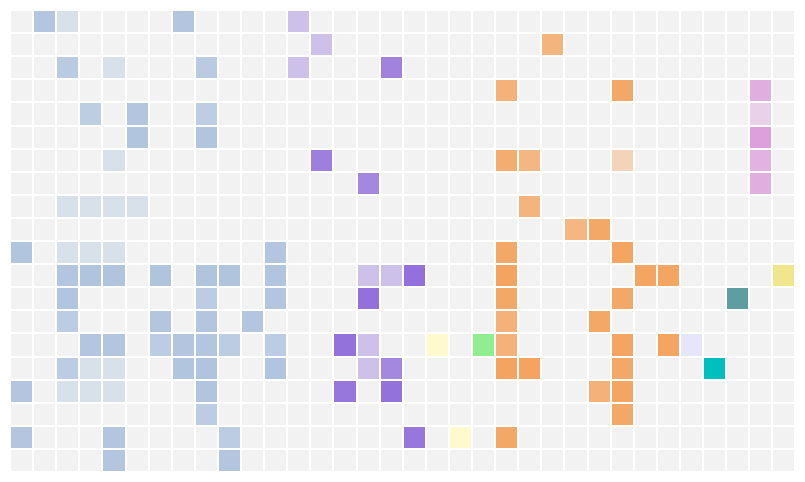

In [240]:
# df = data.loc[data.count(1).sort_values(ascending=True).index,:]
import matplotlib.ticker as ticker
fig = plt.figure(figsize=(12, 6))
df = data
for k,v in reverse_categories.items():

    cm = sns.light_palette(cat_colors[k], as_cmap= True, reverse = True)
    df2 = df.copy()
    nan_col = [col for col in  df2.columns if not col in v]
    df2.loc[:, nan_col]= np.nan
    ax = sns.heatmap(df2, cmap = cm, square = True, vmax = 1.6, linecolor='w', linewidths= 0.01, cbar = False)
    # ax.collections[0].cmap.set_bad(str(1- ind/10))

# ax.xaxis.set_major_locator(ticker.Fixedocator(list(tick_positions.values())))
# ax.xaxis.set_minor_locator(ticker.FixedLocator(minor_ticks))
# ax.set_xticks(list(tick_positions.values()))
# ax.set_xticklabels(list(tick_positions.keys()), fontsize = 8, rotation = 35, ha = 'right')

ax.collections[0].cmap.set_bad('0.95')
ax.set_xticks([])
ax.set_yticks([])  # Remove y-ticks
# ax.set_ylabel("Compounds", fontsize=12)  

In [198]:
data

,OGTT,ob/ob Fasted insulin,DIO Food Intake - After Fast,DIO Food Intake Chronic,DIO Weight,DIO Fasted Glucose,DIO Fasted Leptin,DIO Fasted Insulin,DIO Fasted ADP,DIO DEXA,...,LPS testosterone,LPS cort,Delayed Type Hypersensitiveity,LPS PI IL-6,Monocyte Infiltration MCP-1,OVA PI-induced MCP1,Collagen-induced arthritis,Sebum production,Osteocalcin,Hematology
0,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.1,0.10,NaN,NaN,NaN,0.300000,NaN
4,NaN,NaN,NaN,0.333333,NaN,0.100000,NaN,NaN,0.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.033333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033333,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.4,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:

viz_data = pd.read_excel("/Users/rebeccakrall/Desktop/effect_size.xlsx", sheet_name= "Sheet2", index_col= 0)
# viz_header = pd.read_excel("/Users/rebeccakrall/Desktop/Visualization.xlsx", header = [0,1])
# data_only = viz_data.iloc[:,1:].T



In [71]:
viz_data = viz_data.dropna(axis = 0, how = 'all')

In [102]:
allrows = []
for i in (viz_data.index).unique():
    cat = viz_data.iloc[viz_data.index == i, :].max()
    allrows.append(cat)

df = pd.DataFrame(allrows)
df  = df.set_index((viz_data.index).unique()).T

In [105]:
df_binned = df.apply(lambda col: pd.cut(col, bins=[0, 0.1, 0.3, float('inf')], labels=[1, 2, 3]))


In [106]:
df_binned

,Diabetes,Obesity,Schizophrenia,Seizure,Locomotion,Cognitive,Allergic reaction,Testosterone,Stress,Allergic reeaction,Osteoporosis
14,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,3,NaN,NaN,NaN,2,NaN,NaN,NaN
16,NaN,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1
18,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
19,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
20,NaN,NaN,NaN,3,NaN,NaN,1,NaN,1,2,2
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
22,1,1,2,NaN,NaN,2,1,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,NaN


In [84]:
pro_data = pd.read_excel("/Users/rebeccakrall/Desktop/dashboard_rework.xlsx", skiprows= 1, index_col = 0)

In [ ]:
all_dat = pd.concat([pro_data, df_binned])

In [112]:
category = pd.read_excel("/Users/rebeccakrall/Desktop/Category mapping.xlsx")
new_df = category.loc[:,['Disease 1', 'Category']]
cats = new_df.set_index('Disease 1').to_dict()

In [119]:
new_df = category.loc[:,['Disease 1', 'Category']]
cats = new_df.set_index('Disease 1').to_dict()

In [123]:
category = pd.read_excel("/Users/rebeccakrall/Desktop/Category mapping.xlsx")
new_df = category.loc[:,['Disease 1', 'Category']]
cats = new_df.set_index('Disease 1').to_dict()
cats['Category']

{'Diabetes': 'Metabolic',
 'Obesity': 'Metabolic',
 'Depression': 'Neuropsychiatric',
 'Schizophrenia': 'Neuropsychiatric',
 'Seizure': 'Neuropsychiatric',
 nan: 'Hematology',
 'Locomotion': 'Neuropsychiatric',
 'Cognition': 'Neuropsychiatric',
 'Multiple Sclerosis': 'Neurodegenerative',
 "Parkinson's Disease": 'Neurodegenerative',
 'Acute Pain': 'Pain',
 'Neuropathies': 'Pain',
 'Allergic Reaction': 'Inflammation/Immunological',
 'Testosterone': 'Inflammation/Immunological',
 'Stress': 'Inflammation/Immunological',
 'Asthma': 'Inflammation/Immunological',
 'Rheumatoid Arthritis': 'Inflammation/Immunological',
 'GI motility': 'GI',
 'Bleeding Time': nan,
 'Acne': 'Dermatology',
 'Osteoporosis': 'Bone',
 "Alzheimers's Disease": 'Neurodegenerative',
 'Tranplantation ': 'Inflammation/Immunological',
 'Chronic Kidney Disease': 'Inflammation/Immunological',
 'Respiratory depression': 'Pulmonary ',
 'Blood Pressure': 'Cardiovascular',
 'Cancer of any type': 'Cancer',
 'Stroke': 'Cardiovascul

In [109]:
viz_data = pd.read_excel("/Users/rebeccakrall/Desktop/Visualization.xlsx", skiprows =1 )
viz_header = pd.read_excel("/Users/rebeccakrall/Desktop/Visualization.xlsx", header = [0,1])
data_only = viz_data.iloc[:,5:-1]
column_cats = {k:v for v,k in viz_header.iloc[:,5:-1].columns}

lowest_dose = pd.DataFrame()
max_val = viz_data.iloc[:, -1]
for c in data_only.columns:
    dat = []
    for v in data_only[c]:
        if type(v) == str:
            if 't' in v:
                dat.append(np.nan)
            else:
                dat.append(float(v.split(',')[0]))
        else:
            dat.append(v)
        
    dose = pd.Series(dat).astype(float)/max_val.astype(float)
    lowest_dose[c] = dose
lowest_dose = lowest_dose.dropna(axis = 1, how= 'all')

In [128]:
def pull_new_dat():

    viz_data = pd.read_excel("/Users/rebeccakrall/Desktop/effect_size.xlsx", sheet_name= "Sheet2", index_col= 0)
    viz_data = viz_data.dropna(axis = 0, how = 'all')
    allrows = []
    for i in (viz_data.index).unique():
        cat = viz_data.iloc[viz_data.index == i, :].max()
        allrows.append(cat)
    df = pd.DataFrame(allrows)
    df  = df.set_index((viz_data.index).unique()).T

    df_binned = df.apply(lambda col: pd.cut(col, bins=[0, 0.1, 0.3, float('inf')], labels=[1, 2, 3]))
    pro_data = pd.read_excel("/Users/rebeccakrall/Desktop/dashboard_rework.xlsx", skiprows= 1, index_col = 0)
    all_dat = pd.concat([pro_data, df_binned])

    category = pd.read_excel("/Users/rebeccakrall/Desktop/Category mapping.xlsx")
    new_df = category.loc[:,['Disease 1', 'Category']]
    cats = new_df.set_index('Disease 1').to_dict()

    return all_dat, cats['Category']

In [129]:
data, cats = pull_new_dat()

In [130]:
data.columns

Index(['GI motility', 'Diabetes', 'Obesity', 'Depression', 'Schizophrenia',
       'Multiple Sclerosis', 'Alzheimers's Disease', 'Parkinson's Disease',
       'Stroke', 'Rheumatoid Arthritis', 'Tranplantation ',
       'Chronic Kidney Disease', 'Allergic Reaction', 'Asthma', 'Neuropathies',
       'Acute Pain', 'Respiratory depression', 'Acne', 'Bleeding Time',
       'Hypercholesterolemia', 'Blood Pressure', 'Cancer of any type',
       'Seizure', 'Locomotion', 'Cognitive', 'Allergic reaction',
       'Testosterone', 'Stress', 'Allergic reeaction', 'Osteoporosis'],
      dtype='object')

In [196]:
viz_data = pd.read_excel("/Users/rebeccakrall/Desktop/effect_size.xlsx", sheet_name= "Sheet3", index_col= 0)

category = pd.read_excel("/Users/rebeccakrall/Desktop/Category mapping.xlsx")

print(category.columns)

new_df = category.loc[:,['Disease 1', 'Category']]
cats = new_df.set_index('Disease 1').to_dict()

assay_df = category.loc[:,['Assay', 'Disease 1']]
assay_map = assay_df.set_index('Assay').to_dict()


Index(['Category', 'Assay', 'Disease 1', 'Disease 2'], dtype='object')


In [202]:
viz_data.index = viz_data.index.map(assay_map['Disease 1'])

In [203]:
viz_data

,14,15,16,17,18,19,20,21,22,23,1,2,3,4,5,6,7,9,10
Diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152778,NaN,NaN,NaN,NaN,NaN,0.240741,0.203704,0.166667
Diabetes,0.054688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity,0.028125,NaN,0.048958,NaN,NaN,NaN,NaN,NaN,0.058333,NaN,NaN,NaN,NaN,0.833333,1.597222,NaN,NaN,NaN,NaN
Obesity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diabetes,NaN,NaN,NaN,NaN,0.062500,0.007143,NaN,NaN,0.046875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diabetes,0.062500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.416667,0.263889,NaN,NaN,NaN
Obesity,NaN,NaN,0.046875,0.070312,0.171875,0.082031,NaN,NaN,NaN,NaN,NaN,0.194444,0.147222,NaN,0.190972,4.074074,0.222222,NaN,NaN
Obesity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180556,NaN,0.388889,0.500000,NaN,NaN,0.076389,0.090278


In [199]:
viz_data.index

Index(['OGTT', 'ob/ob Fasted insulin', 'DIO Food Intake - After Fast',
       'DIO Food Intake Chronic', 'DIO Weight', 'DIO Fasted Glucose',
       'DIO Fasted Leptin', 'DIO Fasted Insulin', 'DIO Fasted ADP', 'DIO DEXA',
       'Stress-induced Cort', 'Fed Leptin', 'Fed Insulin', 'PPI', 'MES', 'FST',
       'Modified Irwin', 'OFA', 'Fear', 'TST', 'PTZ-induced seizure',
       'EAE-OFA', 'MPTP-OFA', 'MPTP-DA', 'Hot Plate', 'von Frey w/ carragenan',
       'Formalin', 'LPS TNFa', 'LPS IL-6', 'LPS testosterone', 'LPS cort',
       'Delayed Type Hypersensitiveity', 'LPS PI TNFa', 'LPS PI IL-6',
       'Monocyte Infiltration MCP-1', 'OVA PI-induced MCP1',
       'Contact Hypersensitivity', 'Collagen-induced arthritis',
       'Colonic Motility', 'Morphine-induced constipation', 'ACH writhing',
       'Diuretic-induced stress (mic)', 'Bleeding time', 'Sebum production',
       'Osteocalcin'],
      dtype='object')

In [135]:

data, categories = pull_new_dat()

# create a graph with all the possible nodes
# G = nx.Graph()
# G.add_nodes_from(data.columns)

# create a dict of graphs for each individual compound
compounds = {}
edges = {}
for ind, row in data.iterrows():
    sig = row.dropna().index
    compounds[ind] = nx.Graph()
    compounds[ind].add_edges_from(list(combinations(sig,2)))

    for edge in list(combinations(sig,2)):
        if edge in edges:
            edges[edge] = edges[edge] + 1
        else:
            edges[edge] = 1

cat_edges = {}
for e in edges.keys():
    new_key = (categories[e[0]], categories[e[1]])
    if new_key[0] != new_key[1]:
        if new_key in cat_edges:
            cat_edges[new_key] = cat_edges[new_key]+1
        else:
            cat_edges[new_key] = 1

G = nx.Graph()
G.add_edges_from(edges)

In [136]:
G.nodes

NodeView(('GI motility', 'Multiple Sclerosis', "Alzheimers's Disease", "Parkinson's Disease", 'Stroke', 'Tranplantation ', 'Asthma', 'Acne', 'Bleeding Time', 'Hypercholesterolemia', 'Blood Pressure', 'Diabetes', 'Schizophrenia', 'Rheumatoid Arthritis', 'Allergic Reaction', 'Acute Pain', 'Cancer of any type', 'Neuropathies', 'Respiratory depression', 'Obesity', 'Depression', 'Chronic Kidney Disease', 'Seizure', 'Testosterone', 'Locomotion', 'Osteoporosis', 'Stress', 'Cognition'))

In [161]:
def generate_random_points(center, radius, num_points, min_spacing=None):
    """
    Generates `num_points` randomly distributed within a given `radius` of `center`.
    Optionally ensures a minimum distance (`min_spacing`) between points.
    """
    points = []
    attempts = 0
    max_attempts = num_points * 10  # To prevent infinite loops

    while len(points) < num_points and attempts < max_attempts:
        # Random angle
        theta = np.random.uniform(0, 2 * np.pi)
        # Random radius with sqrt distribution for even spacing
        r = radius * np.sqrt(np.random.uniform(0, 1))

        # Convert to Cartesian
        x = center[0] + r * np.cos(theta)
        y = center[1] + r * np.sin(theta)

        # Check minimum spacing
        if min_spacing is None or all(np.linalg.norm(np.array([x, y]) - np.array(p)) >= min_spacing for p in points):
            points.append((x, y))
        
        attempts += 1
    
    return points

In [162]:
import math
dummy_graph = nx.Graph()
dummy_graph.add_edges_from(cat_edges.keys())
catpos = nx.arf_layout(dummy_graph)  

dists = []
for a in list(combinations(catpos.keys(),2)):
    dists.append(math.dist(catpos[a[0]] , catpos[a[1]]))


catsample = {}
for cat, vertex in catpos.items():
    cat_count = sum([True for x in categories.values() if x == cat])
    max_jitter = min(dists)/3
    # sampler = qmc.PoissonDisk(d=2, radius = max_jitter/2)
    # catsample[cat] = list(np.random.normal(0, max_jitter, cat_count*2).reshape(cat_count,2) + catpos[cat])
    catsample[cat] = list(generate_random_points(catpos[cat], max_jitter, cat_count, min_spacing=0.05))

In [163]:
catsample

{'GI': [(np.float64(-2.4574758815087065), np.float64(1.8102139768615537))],
 'Neurodegenerative': [(np.float64(-2.301177177713944),
   np.float64(-0.03908933668424455)),
  (np.float64(-2.589631874275704), np.float64(-0.4395283905620268)),
  (np.float64(-2.4507468029000594), np.float64(-0.009778543833783071))],
 'Cardiovascular': [(np.float64(1.9439773467202772),
   np.float64(-1.4551294929538863)),
  (np.float64(1.5583936721185494), np.float64(-1.0473049575619615)),
  (np.float64(1.6396696497348813), np.float64(-1.3891282995705434))],
 'Inflammation/Immunological': [(np.float64(-1.056178186111059),
   np.float64(1.568433830569263)),
  (np.float64(-1.3728464389827537), np.float64(1.7121489833632688)),
  (np.float64(-1.2979095936816376), np.float64(1.5852448367925212)),
  (np.float64(-1.2972571043150363), np.float64(1.455793042631008)),
  (np.float64(-0.957512716294749), np.float64(1.2885920909918678)),
  (np.float64(-1.0134050837797035), np.float64(1.2309190990681034)),
  (np.float64(-0

In [152]:
categories

{'Diabetes': 'Metabolic',
 'Obesity': 'Metabolic',
 'Depression': 'Neuropsychiatric',
 'Schizophrenia': 'Neuropsychiatric',
 'Seizure': 'Neuropsychiatric',
 nan: 'Hematology',
 'Locomotion': 'Neuropsychiatric',
 'Cognition': 'Neuropsychiatric',
 'Multiple Sclerosis': 'Neurodegenerative',
 "Parkinson's Disease": 'Neurodegenerative',
 'Acute Pain': 'Pain',
 'Neuropathies': 'Pain',
 'Allergic Reaction': 'Inflammation/Immunological',
 'Testosterone': 'Inflammation/Immunological',
 'Stress': 'Inflammation/Immunological',
 'Asthma': 'Inflammation/Immunological',
 'Rheumatoid Arthritis': 'Inflammation/Immunological',
 'GI motility': 'GI',
 'Bleeding Time': nan,
 'Acne': 'Dermatology',
 'Osteoporosis': 'Bone',
 "Alzheimers's Disease": 'Neurodegenerative',
 'Tranplantation ': 'Inflammation/Immunological',
 'Chronic Kidney Disease': 'Inflammation/Immunological',
 'Respiratory depression': 'Pulmonary ',
 'Blood Pressure': 'Cardiovascular',
 'Cancer of any type': 'Cancer',
 'Stroke': 'Cardiovascul

In [164]:

pos= {}
for node in G.nodes:
    print(node)
    # center = catpos[categories[node]]
    pos[node] = catsample[categories[node]].pop()

GI motility
Multiple Sclerosis
Alzheimers's Disease
Parkinson's Disease
Stroke
Tranplantation 
Asthma
Acne
Bleeding Time


IndexError: pop from empty list

In [157]:
catsample[categories[node]].pop()

array([-0.57156526, -0.82543486])

In [153]:
[True for x in G.nodes if categories[x] == 'GI']

[True]

In [ ]:
from Melior_Therapeutic_Profiles import create_graphs

In [167]:
G, compounds, edges, pos, node_positions, cat_colors, node_colors = create_graphs()

In [171]:
compounds['Asprin'].nodes

NodeView(('GI motility', 'Diabetes', 'Schizophrenia', "Alzheimers's Disease", 'Stroke', 'Rheumatoid Arthritis', 'Allergic Reaction', 'Acute Pain', 'Acne', 'Bleeding Time', 'Blood Pressure', 'Cancer of any type'))

In [173]:
row = data.iloc[0,:]

In [174]:
sig = row.dropna().index

In [179]:
row[sig].to_dict()

{'GI motility': 1.0,
 'Multiple Sclerosis': 2.0,
 "Alzheimers's Disease": 1.0,
 "Parkinson's Disease": 1.0,
 'Stroke': 2.0,
 'Tranplantation ': 1.0,
 'Asthma': 1.0,
 'Acne': 1.0,
 'Bleeding Time': 1.0,
 'Hypercholesterolemia': 3.0,
 'Blood Pressure': 2.0}

In [180]:
cat_colors

{'Hematology': 'orangered',
 'Cancer': 'plum',
 'Metabolic': 'mediumpurple',
 'Bone': 'mediumaquamarine',
 'Neurodegenerative': 'lightsteelblue',
 'Neuropsychiatric': 'lawngreen',
 'Pain': 'cadetblue',
 'Dermatology': 'blueviolet',
 'Inflammation/Immunological': 'mediumturquoise',
 'Cardiovascular': 'chocolate',
 'GI': 'sandybrown',
 'Pulmonary ': 'skyblue'}

In [187]:
{k:cat_colors[k] for k in list(set([categories[x] for x in G.nodes]))}

{'Cancer': 'plum',
 'Metabolic': 'mediumpurple',
 'Bone': 'mediumaquamarine',
 'Neurodegenerative': 'lightsteelblue',
 'Neuropsychiatric': 'lawngreen',
 'Dermatology': 'blueviolet',
 'Pain': 'cadetblue',
 'Inflammation/Immunological': 'mediumturquoise',
 'Cardiovascular': 'chocolate',
 'GI': 'sandybrown',
 'Pulmonary ': 'skyblue'}